In [ ]:
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
from tensorflow.keras.datasets import cifar10


In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


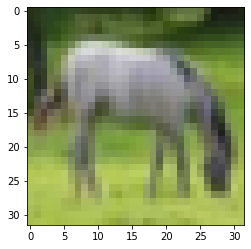

In [ ]:
plt.imshow(x_train[87])

In [ ]:
## normalize data by divide by 255
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train =x_train[:7000]
x_test =x_test[:2000]


In [ ]:
print(x_train.shape)
print(x_test.shape)


(7000, 32, 32, 3)
(2000, 32, 32, 3)


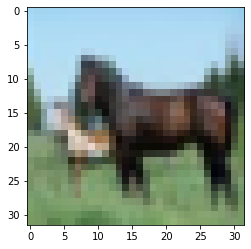

In [ ]:
## after normalize the data'
plt.imshow(x_train[12])

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
y_cat_train = to_categorical(y_train[:7000], num_classes=10)
y_cat_test = to_categorical(y_test[:2000], num_classes=10)

In [ ]:
print(y_cat_train.shape)
print(y_cat_test.shape)

(7000, 10)
(2000, 10)


In [ ]:
import tensorflow as tf

* With **`preserve_aspect_ratio=True`**, the aspect ratio is preserved, so size is the maximum for each dimension

In [ ]:
x_train = tf.image.resize(x_train, [227, 227], preserve_aspect_ratio=True)

In [ ]:
x_train.shape

TensorShape([7000, 227, 227, 3])

In [ ]:
x_test = tf.image.resize(x_test, [227, 227], preserve_aspect_ratio=True)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(7000, 227, 227, 3)
(2000, 227, 227, 3)


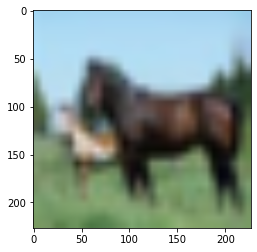

In [ ]:
## After Resize the Image
plt.imshow(x_train[12])


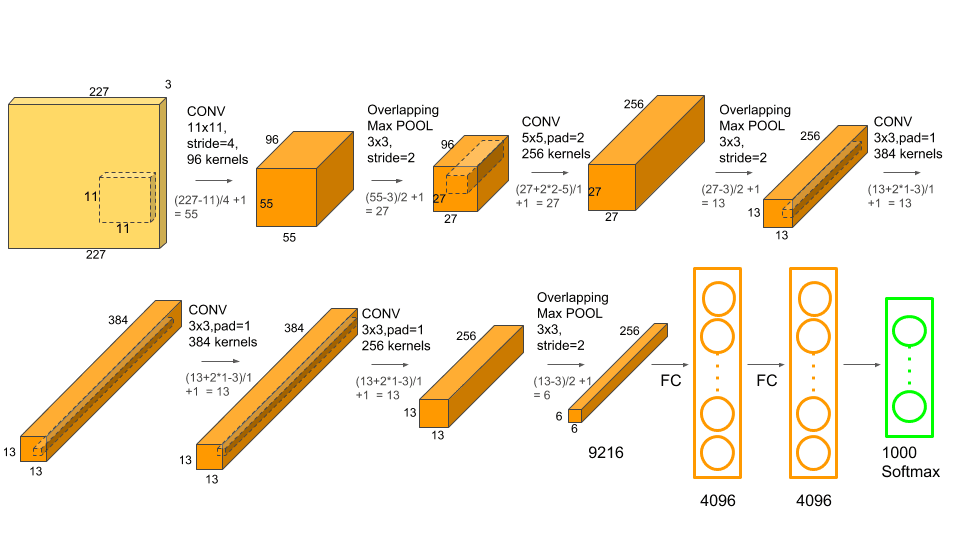

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
class AlexNet(Sequential):

  def __init__(self, input_shape, num_classes):
    super().__init__()

    self.add(Conv2D(filters = 96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
    
    self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

    self.add(Conv2D(filters = 256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
   
    self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

    self.add(Conv2D(filters = 384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

    self.add(Conv2D(filters = 384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

    self.add(Conv2D(filters = 256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
    
    self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid'))
    
    self.add(Flatten())
    self.add(Dense(4096, activation= 'relu'))
    self.add(Dense(4096, activation= 'relu'))
    self.add(Dense(1000, activation= 'relu'))
    self.add(Dense(num_classes, activation= 'softmax'))

    self.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
num_classes = 10
model = AlexNet((227, 227, 3), num_classes)
model

In [ ]:
model.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       132

In [ ]:
from keras.utils.vis_utils import plot_model

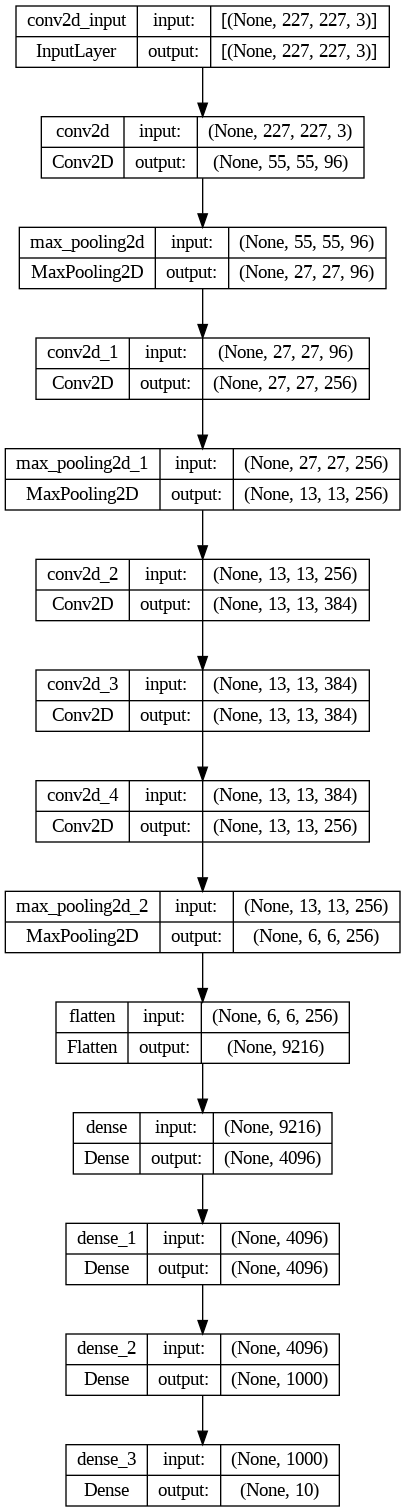

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(x_train,
          y_cat_train,
          batch_size = 500,
          epochs = 43,
          verbose = 1,
          validation_data = (x_test, y_cat_test))


Epoch 1/43
14/14 [==============================] - 30s 692ms/step - loss: 12.1613 - accuracy: 0.1096 - val_loss: 2.2778 - val_accuracy: 0.1350
Epoch 2/43
14/14 [==============================] - 8s 588ms/step - loss: 2.2761 - accuracy: 0.1319 - val_loss: 2.2356 - val_accuracy: 0.1580
Epoch 3/43
14/14 [==============================] - 8s 591ms/step - loss: 2.1891 - accuracy: 0.1717 - val_loss: 2.2245 - val_accuracy: 0.1510
Epoch 4/43
14/14 [==============================] - 8s 610ms/step - loss: 2.2364 - accuracy: 0.1646 - val_loss: 2.2622 - val_accuracy: 0.2020
Epoch 5/43
14/14 [==============================] - 10s 696ms/step - loss: 2.1650 - accuracy: 0.1947 - val_loss: 2.1052 - val_accuracy: 0.1980
Epoch 6/43
14/14 [==============================] - 9s 606ms/step - loss: 2.0400 - accuracy: 0.2363 - val_loss: 1.8723 - val_accuracy: 0.3160
Epoch 7/43
14/14 [==============================] - 9s 616ms/step - loss: 1.8486 - accuracy: 0.3074 - val_loss: 1.7931 - val_accuracy: 0.3330
Epo

In [ ]:
import pandas as pd

In [ ]:
loss= pd.DataFrame(model.history.history)

In [ ]:
loss

,loss,accuracy,val_loss,val_accuracy
0,12.161348,0.109571,2.277832,0.1350
1,2.276086,0.131857,2.235612,0.1580
2,2.189103,0.171714,2.224549,0.1510
3,2.236446,0.164571,2.262174,0.2020
4,2.165013,0.194714,2.105176,0.1980
5,2.040041,0.236286,1.872281,0.3160
6,1.848632,0.307429,1.793123,0.3330
7,1.738208,0.355571,1.704441,0.3695
8,1.661575,0.382857,1.660347,0.3755
9,1.578573,0.415429,1.583667,0.4040


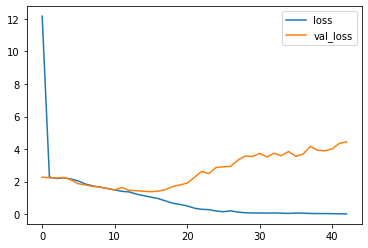

In [ ]:
loss[['loss', 'val_loss']].plot();

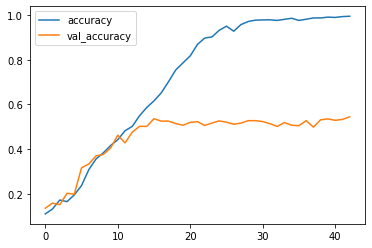

In [ ]:
loss[['accuracy', 'val_accuracy']].plot();